<a href="https://colab.research.google.com/github/NehaKoulecar/Handwritten_Digit_Recognition/blob/master/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digit Recognition - convolutional neural network

In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import math
import datetime
import platform


In [7]:
# Loading tensorboard extension
%load_ext tensorboard

**Loading training and testing data**

The training data includes 60000 images of handwritten digits of 28x28 pixels.

The testing dataset include 10000 images.

In [17]:
# Loading MNIST dataset using Keras library
mnist_data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [18]:
# Verifying the data
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [19]:
# Saving image parameters
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_HEIGHT: 28
IMAGE_WIDTH: 28
IMAGE_CHANNELS: 1


**Exploring data**

Data is an integer matrix

In [20]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


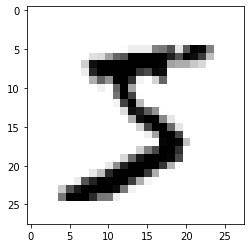

In [21]:
# Visualizing the first image in the matrix
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

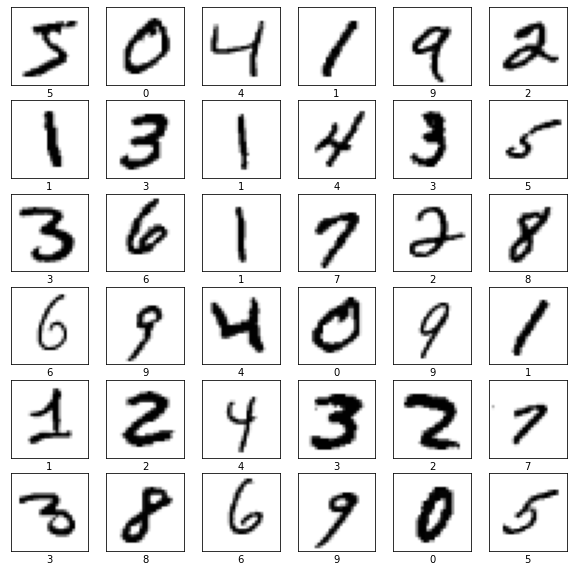

In [22]:
# Displaying first 36 images 
num_display = 36
no_cells = math.ceil(math.sqrt(num_display))
plt.figure(figsize=(10,10))
for i in range(num_display):
    plt.subplot(no_cells, no_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**Data Pre-processing**
We need to restructure our data and add a colour channel in order to employ convolution layers. As you may have seen, each digit currently has the shape of (28, 28), which denotes that it is a 28x28 matrix of colour values ranging from 0 to 255. In order for each pixel to potentially have many channels, we need to restructure it to the shape (28, 28, 1). (like Red, Green and Blue).

In [24]:
x_train_channels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_channels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [26]:
print('x_train_with_channels:', x_train_channels.shape)
print('x_test_with_channels:', x_test_channels.shape)

x_train_with_channels: (60000, 28, 28, 1)
x_test_with_channels: (10000, 28, 28, 1)


**Normalizing data**

Converting value range from [0...255] to [0...1].

In [32]:
x_train_normalize = x_train_channels / 255
x_test_normalize = x_test_channels / 255

In [34]:
# Verifying one row post normalization.
x_train_normalize[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

Building the model

In [35]:
# Sequential Keras model with two pairs of Convolution2D and MaxPooling2D layers.

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

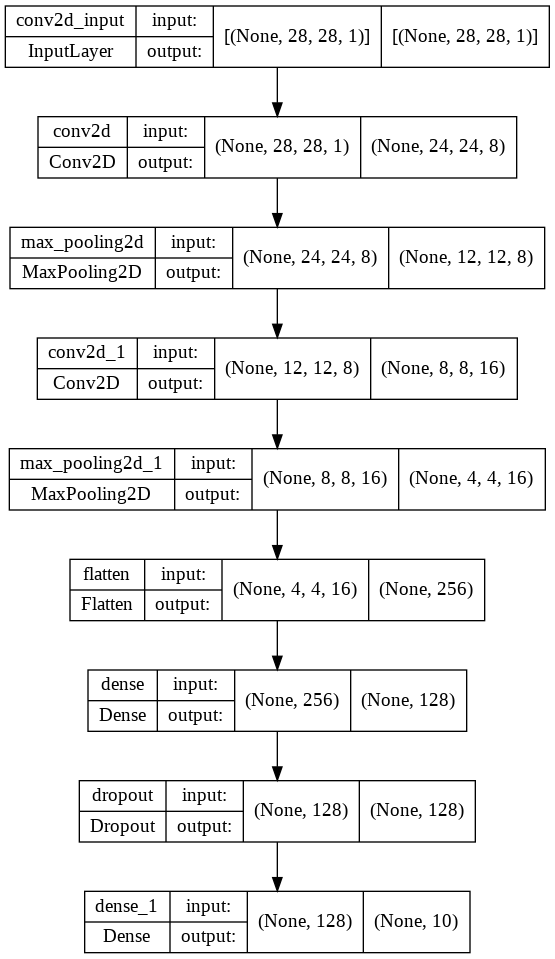

In [24]:
tf.keras.utils.plot_model(                      #plot the model using graphviz 
    model,
    show_shapes=True,
    show_layer_names=True,
)

Compile the model

In [25]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Train the model

In [26]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1936 - accuracy: 0.9396 - val_loss: 0.0567 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0380 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0318 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0324 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0329 -

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.



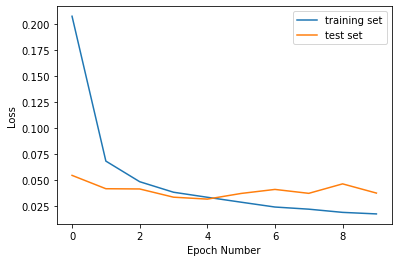

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

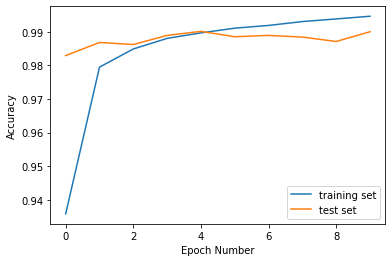

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

Evaluate model accuracy
We need to compare the accuracy of our model on training set and on test set the trained model to perform similarly on both sets.

Training set accuracy

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.00762903830036521
Training accuracy:  0.9974833130836487


Test set accuracy

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03754904121160507
Validation accuracy:  0.9900000095367432


Save the model

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])   #use predict() method to predict digit


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.181820e-10,1.640661e-09,3.803803e-09,1.771572e-07,1.017853e-09,3.352518e-10,5.971910e-16,9.999999e-01,8.785988e-12,1.081200e-08
1,6.876310e-10,6.987218e-11,1.000000e+00,1.144222e-13,3.130809e-17,2.112981e-16,2.142466e-11,1.183096e-11,4.700480e-15,1.377410e-17
2,1.455124e-08,9.999958e-01,9.226252e-08,7.444146e-13,1.922605e-06,3.427926e-09,1.073539e-08,1.308077e-07,1.985729e-06,1.919531e-10
3,9.999994e-01,1.033422e-13,2.161214e-10,2.545843e-10,6.106524e-12,9.065019e-12,6.334524e-07,1.393303e-13,2.114357e-10,5.091418e-09
4,2.180343e-10,6.490530e-11,2.366279e-11,2.194786e-12,9.999999e-01,1.194056e-13,9.395622e-11,2.188041e-11,4.924698e-11,8.742760e-08
...,...,...,...,...,...,...,...,...,...,...
9995,4.647120e-12,4.222897e-09,9.999989e-01,3.526376e-10,4.344354e-14,1.801792e-16,1.396118e-14,1.101299e-06,1.707208e-12,1.188466e-15
9996,3.336604e-12,5.374505e-09,3.468084e-12,9.999999e-01,1.181672e-17,8.519263e-08,6.000399e-19,2.162128e-12,3.949232e-12,7.448715e-11
9997,4.964289e-19,1.888181e-12,4.306723e-17,1.227220e-20,1.000000e+00,1.390810e-17,1.582874e-18,4.847463e-14,3.665571e-12,2.270681e-15
9998,2.432093e-10,3.885360e-14,1.692786e-19,4.388074e-08,8.361954e-20,9.999993e-01,9.852117e-12,6.780062e-21,6.786016e-07,1.949229e-15


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print(predictions[4])

4


Let's print the fourth image from a test set to see if model's prediction is correct.

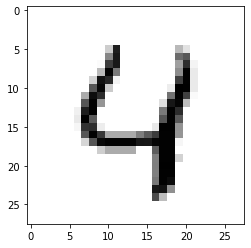

In [ ]:
plt.imshow(x_test_normalized[4].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

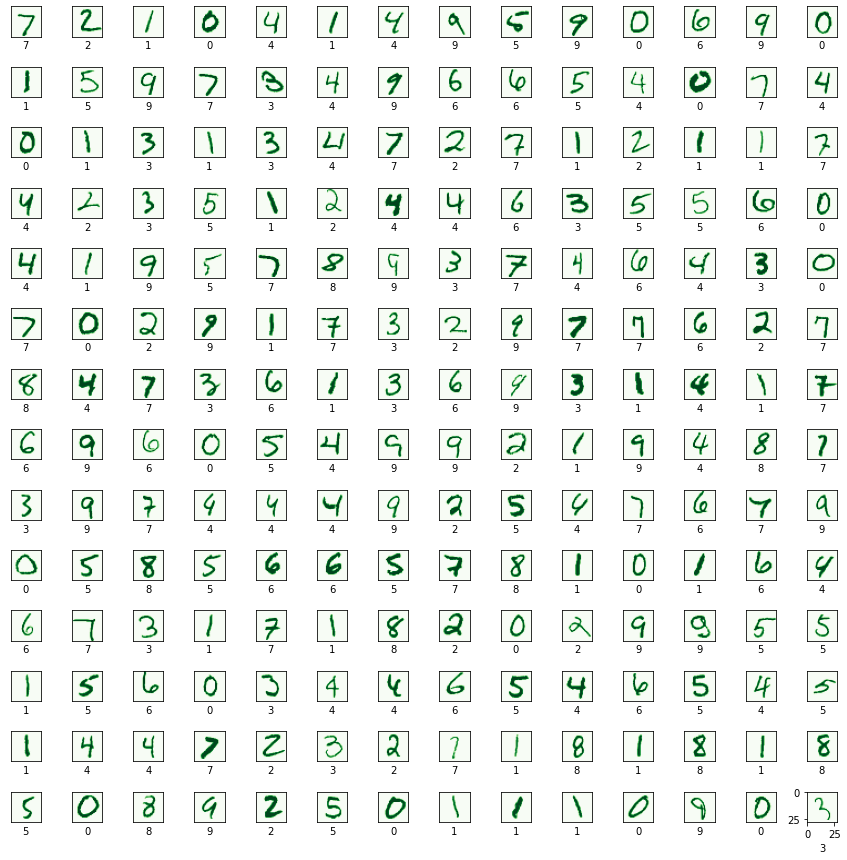

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Plotting a confusion matrix

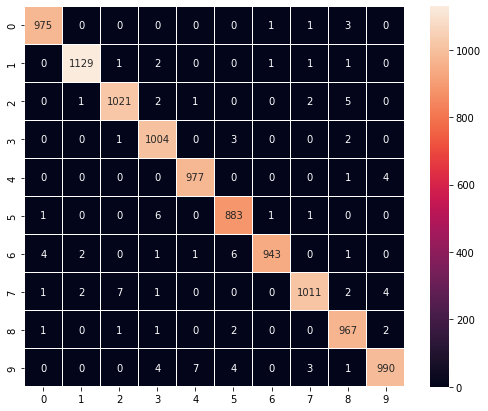

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()